# Setup

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

COMFYUI_INSTALL_DIR = "/content/drive/MyDrive/Colab Notebooks/Presti/ComfyUI"

os.environ["COMFYUI_INSTALL_DIR"] = COMFYUI_INSTALL_DIR
os.environ["COMFYUI_API_URL"] = "http://127.0.0.1:8188"
os.environ['DATA_DIR'] = '/content/drive/MyDrive/Colab storage/inpainting-review'

In [ ]:
!git clone https://github.com/camlhui/inpainting-review.git

In [ ]:
%cd /content/inpainting-review/
!git pull origin main

In [ ]:
pip install .

# Start ComfyUI server

For some reason the CLI command `comfy2py start` doesn't work properly in a notebook cell. It successfully start the server but never completes.

In [7]:
from inpainting_review.comfyui.server import start

start()

Cloudflared is not installed. Installing...
Cloudflared installed successfully.


ComfyUI server started with PID 7169
stdout redirected to: /tmp/comfyui_stdout_i0haswe0.log
stderr redirected to: /tmp/comfyui_stderr_k_la7os3.log


[stdout]: [START] Security scan
[stdout]: [DONE] Security scan
[stdout]: ## ComfyUI-Manager: installing dependencies done.
[stdout]: ** ComfyUI startup time: 2024-12-01 22:29:57.362644
[stdout]: ** Platform: Linux
[stdout]: ** Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
[stdout]: ** Python executable: /usr/bin/python3
[stdout]: ** ComfyUI Path: /content/drive/MyDrive/Colab Notebooks/Presti/ComfyUI
[stderr]: Total VRAM 40514 MB, total RAM 85480 MB
[stdout]: ** Log path: /content/inpainting-review/comfyui.log
[stderr]: pytorch version: 2.5.1+cu121
[stdout]: 
[stderr]: Set vram state to: NORMAL_VRAM
[stdout]: Prestartup times for custom nodes:
[stderr]: Device: cuda:0 NVIDIA A100-SXM4-40GB : cudaMallocAsync
[stdout]: 0.5 seconds: /content/

In [8]:
!curl -I http://127.0.0.1:8188

HTTP/1.1 200 OK
Cache-Control: no-cache
Pragma: no-cache
Expires: 0
Access-Control-Allow-Origin: *
Access-Control-Allow-Methods: POST, GET, DELETE, PUT, OPTIONS
Access-Control-Allow-Headers: Content-Type, Authorization
Access-Control-Allow-Credentials: true
Content-Type: text/html
Etag: "180cdaa32cfb7600-5c3"
Last-Modified: Sat, 30 Nov 2024 20:59:11 GMT
Content-Length: 1475
Accept-Ranges: bytes
Date: Sun, 01 Dec 2024 22:32:16 GMT
Server: Python/3.10 aiohttp/3.11.2



In [26]:
DATA_DIR = os.environ["DATA_DIR"]

IMAGE_PATH = f"{DATA_DIR}/source/cabinet.png"
MASK_PATH = f"{DATA_DIR}/mask/cabinet_green_plant.png"
OUTPUT_PATH = f"{DATA_DIR}/output/tests/cabinet_inpainted_12.png"

import os

os.path.exists(OUTPUT_PATH)

False

In [28]:
!comfy2py run \
  stable-diffusion-2-inpainting \
  "{IMAGE_PATH}" \
  "{MASK_PATH}" \
  "{OUTPUT_PATH}" \
  --prompt "a green plant on a cabinet"

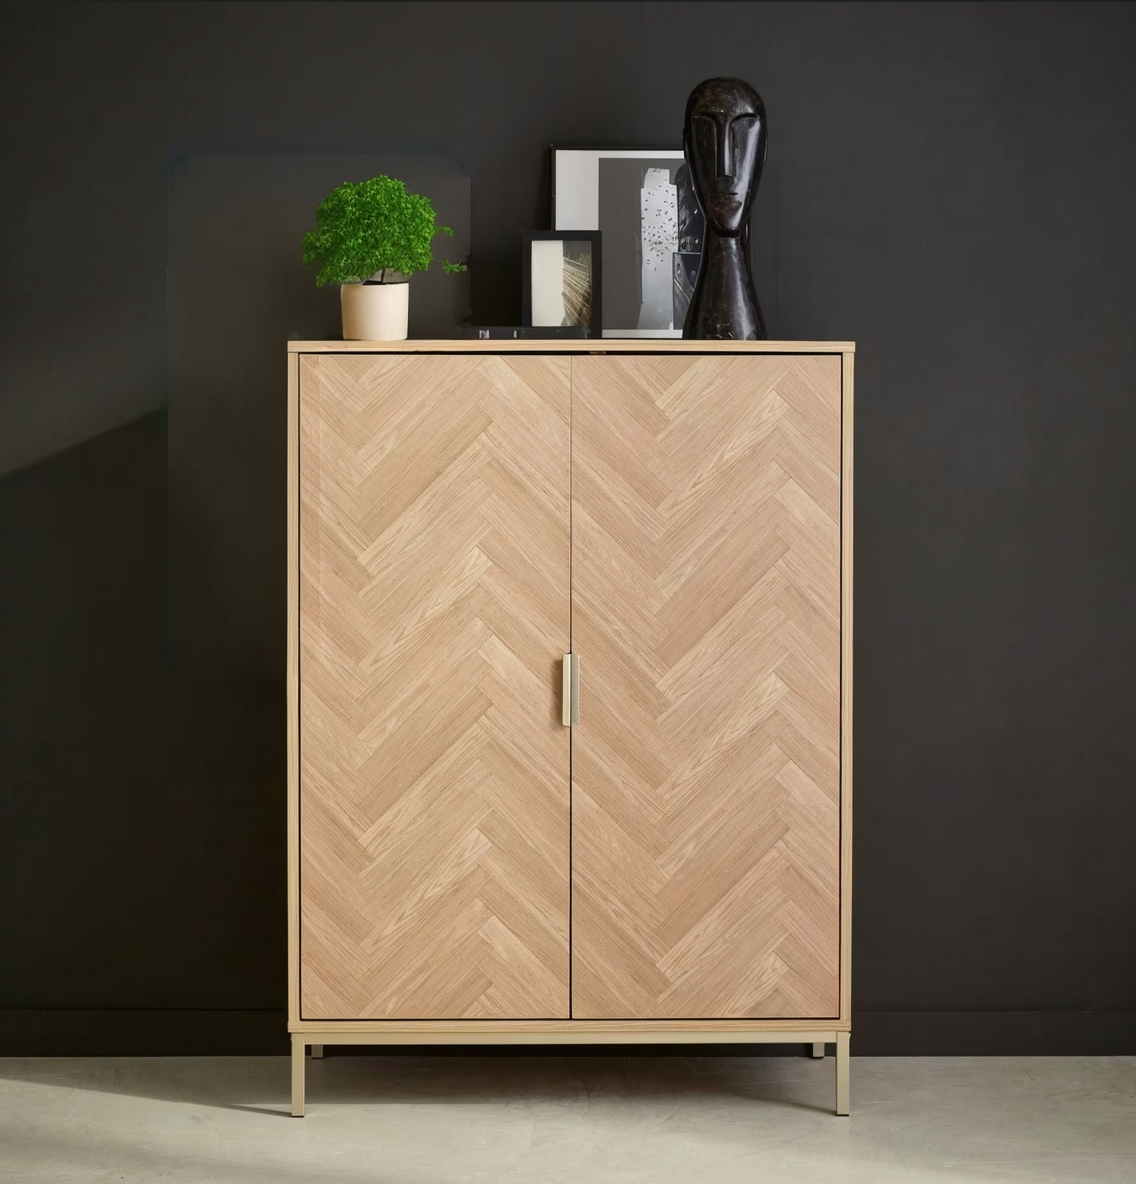

In [33]:
from IPython.display import Image, display

display(Image(filename=OUTPUT_PATH, width=256, height=256))

In [35]:
!comfy2py flush


Flush successful.


In [36]:
!comfy2py stop

Terminating python3 with PID 7169
Terminating cloudflared with PID 7818
